# Product matching 

 Importing Pandas to read the data and create a dataframe

In [1]:
import pandas as pd

In [2]:
data = pd.read_parquet("offers_training.parquet")

In [5]:
print(data.shape)
data.head()

(102884, 10)


,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4...",24.99,https://www.aboutyou.de/p/pieces/kleid-6732409,[https://cdn.aboutstatic.com/file/images/06728...
1,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke""...",34.90,https://www.aboutyou.at/p/lascana/bikinihose-5...,[https://cdn.aboutstatic.com/file/8ba09c163f54...
2,f0328791-9839-4bc1-ac62-78b7515e9601,aboutyou,de,MAMALICIOUS,beige | Beige,Chino-Hose,"{""Marke"": [""MAMALICIOUS""], ""Gr\u00f6\u00dfenla...",21.99,https://www.aboutyou.de/p/mamalicious/chino-ho...,[https://cdn.aboutstatic.com/file/images/90ddf...
3,556e8f61-b1d7-4d72-8bae-d74f9357270b,aboutyou,de,rosemunde,rosa | Pink,Top / Seidentop,"{""Marke"": [""rosemunde""], ""Zielgruppe"": [""Femal...",49.99,https://www.aboutyou.de/p/rosemunde/top-seiden...,[https://cdn.aboutstatic.com/file/images/3cf28...
4,48b32330-0a6e-4c10-9ef5-c585ac6da701,aboutyou,de,PIECES,mischfarben | schwarz | Mischfarben | Schwarz,Kleid,"{""\u00c4rmell\u00e4nge"": [""Langarm""], ""Ausschn...",39.90,https://www.aboutyou.at/p/pieces/kleid-5195289,[https://cdn.aboutstatic.com/file/images/c85d6...


In [6]:
data["url"][0]

'https://www.aboutyou.de/p/pieces/kleid-6732409'

In [7]:
a = data["description"][1]

Translating the discription to understand the contents.

In [8]:
from googletrans import Translator

translator = Translator()

translated_text = translator.translate(a)

In [9]:
print(translated_text)

Translated(src=de, dest=en, text={"Brief\u00f6he": ["Super Low Waist"], "Brand": ["LASCANA"], "Quick Filter Style Group": ["Classic"], "Search Color": ["Black"], "Gr \u00f6\u00dfenlauf": ["Women - Conf. D"], "Detail Color": ["black", "mixed colors"], "Pattern": ["Flowered/Floral"], "Design": [" Topstitched hem/edge"], "Extras": ["Label Plate", "Appliqués"], "Vendorsizerun-Label": ["Deutsche Konfection"], "Gr\u00f6\u00dfe": ["def_female_int"], " Special Sizes for Category Mapping": ["Large Sizes", "Medium Cups", "Small Cups", "Large Cups"], "Gender": ["Women"] , "Product type": ["Bikini pants"], "Supplier": ["Otto"], "New": ["new_aoat"], "Material sustainability": ["Recycled polyamide"], "Sustainability": ["Eco -Friendly material"], "Display Colors": ["black"], "Style group": ["modern"], "Brand logo": ["LASCANA"], "Sustainable": true, "Sponsor badge": ["sponsorBadge"], "Sponsored type": ["sponsoredType"], "Name": ["Bikini Bottom"], "Description": ["<table class=\"tmpArticle DetailTable\

Importing the matching products

In [10]:
matches = pd.read_parquet("matches_training.parquet")

In [11]:
matches.shape

(15170, 3)

In [13]:
X_test.shape

(106741, 10)

In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106741 entries, 0 to 106740
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   offer_id     106741 non-null  object 
 1   shop         106741 non-null  object 
 2   lang         106741 non-null  object 
 3   brand        106741 non-null  object 
 4   color        106726 non-null  object 
 5   title        106741 non-null  object 
 6   description  106741 non-null  object 
 7   price        106740 non-null  float64
 8   url          106741 non-null  object 
 9   image_urls   106684 non-null  object 
dtypes: float64(1), object(9)
memory usage: 8.1+ MB


Number of unique brands

In [15]:
X_test['brand'].nunique()

164

##### A function to get the offers

In [30]:
def get_offers_by_shop(offers):
    """ Get offers per shop """   
    offers_zal = offers[(offers['shop'] == 'zalando')]
    offers_comp = offers[(offers['shop'] == 'aboutyou')]
    return offers_zal, offers_comp

Splitting the dataset into two sets, one containing all the Zalando offers and the other containing about you offers

In [17]:
zalando, a_you = get_offers_by_shop(data)

Setting offer_id as the index

In [18]:
zalando=zalando.set_index('offer_id')
a_you = a_you.set_index('offer_id')
zalando.head()

,shop,lang,brand,color,title,description,price,url,image_urls
offer_id,,,,,,,,,
02df5ca3-8adc-48fa-bf42-91b41c3ea5a9,zalando,de,Guess,weiß,JUNIOR REVERSIBLE HOODED LONG Wintermantel,skirt_details Eingrifftaschen | Ziersteine $ n...,150.685455,https://www.zalando.de/lookup/article/GU123L05...,[https://img01.ztat.net/article/1ec35ff491c54e...
08c47691-4160-41df-81c5-ea108f2ae539,zalando,de,Ellesse,weiß,HOLLINA SHIRT & LEGGING Pyjama Nachtwäsche Set,name_suffix white $ pattern print $ material.u...,39.958182,https://www.zalando.de/lookup/article/EL981P00...,[https://img01.ztat.net/article/511a8191c10549...
96fc5065-3a31-42f0-bfbd-34ee94324807,zalando,de,Selected,blau,SLHSLIMMARK WASHED Businesshemd,main_supplier_code K70240 $ name_suffix dark s...,39.990909,https://www.zalando.de/lookup/article/SE622D0Y...,[https://img01.ztat.net/article/4ca1292819fa35...
04341c9e-4043-4478-9a64-266ac38480b5,zalando,de,Ellesse,schwarz,NURRA FASHION TRUNKS 5 PACK Panties,main_supplier_code K10441 $ name_suffix black ...,32.958182,https://www.zalando.de/lookup/article/EL982O00...,[https://img01.ztat.net/article/ca67693a608332...
346abc38-d9ae-431a-8e6a-64f7bb3ade7e,zalando,de,Selected,braun,SLFOLIVE CARDIGAN Strickjacke,name_suffix carafe $ pattern meliert $ materia...,89.990909,https://www.zalando.de/lookup/article/SE521I0P...,[https://img01.ztat.net/article/a797f668349e4d...


In [19]:
a_you.head(50)

,shop,lang,brand,color,title,description,price,url,image_urls
offer_id,,,,,,,,,
d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4...",24.99,https://www.aboutyou.de/p/pieces/kleid-6732409,[https://cdn.aboutstatic.com/file/images/06728...
c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke""...",34.90,https://www.aboutyou.at/p/lascana/bikinihose-5...,[https://cdn.aboutstatic.com/file/8ba09c163f54...
f0328791-9839-4bc1-ac62-78b7515e9601,aboutyou,de,MAMALICIOUS,beige | Beige,Chino-Hose,"{""Marke"": [""MAMALICIOUS""], ""Gr\u00f6\u00dfenla...",21.99,https://www.aboutyou.de/p/mamalicious/chino-ho...,[https://cdn.aboutstatic.com/file/images/90ddf...
556e8f61-b1d7-4d72-8bae-d74f9357270b,aboutyou,de,rosemunde,rosa | Pink,Top / Seidentop,"{""Marke"": [""rosemunde""], ""Zielgruppe"": [""Femal...",49.99,https://www.aboutyou.de/p/rosemunde/top-seiden...,[https://cdn.aboutstatic.com/file/images/3cf28...
48b32330-0a6e-4c10-9ef5-c585ac6da701,aboutyou,de,PIECES,mischfarben | schwarz | Mischfarben | Schwarz,Kleid,"{""\u00c4rmell\u00e4nge"": [""Langarm""], ""Ausschn...",39.90,https://www.aboutyou.at/p/pieces/kleid-5195289,[https://cdn.aboutstatic.com/file/images/c85d6...
1db3c99c-fc6a-4d30-b916-17c36de9fd14,aboutyou,de,ELLESSE,weiß | Weiß,Sneaker,"{""Gr\u00f6\u00dfe"": [""def_female_eur""], ""Zielg...",74.95,https://www.aboutyou.de/p/ellesse/sneaker-4686226,[https://cdn.aboutstatic.com/file/images/ceba7...
18069589-7d8b-49f5-9d5a-506d1a061719,aboutyou,de,ELLESSE,weiß | dunkelblau | orange | Weiß,Sportshirt 'Selvettet',"{""Suchfarbe"": [""Wei\u00df""], ""Detailfarbe"": [""...",24.90,https://www.aboutyou.de/p/ellesse/sportshirt-s...,[https://cdn.aboutstatic.com/file/images/98884...
ea0df12f-3b4d-4635-aaf2-503523dafa9b,aboutyou,de,Free People,schwarz | Schwarz,Slip 'TAMEEKA',"{""Zielgruppe"": [""Female""], ""Material"": [""Jerse...",21.90,https://www.aboutyou.de/p/free-people/slip-tam...,[https://cdn.aboutstatic.com/file/images/ab38b...
fb56d20d-c973-4f7a-8152-a8bf1f5748f7,aboutyou,de,BULLBOXER,cognac | dunkelblau | Braun,Schnürboots,"{""Zielgruppe"": [""Male""], ""Material"": [""Glattle...",84.90,https://www.aboutyou.at/p/bullboxer/schnurboot...,[https://cdn.aboutstatic.com/file/images/9d5ce...


In [20]:
dataset = matches

#### Replacing the null values with a string

In [21]:
dataset.fillna("")
zalando.fillna("")
a_you.fillna("")

,shop,lang,brand,color,title,description,price,url,image_urls
offer_id,,,,,,,,,
d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4...",24.99,https://www.aboutyou.de/p/pieces/kleid-6732409,[https://cdn.aboutstatic.com/file/images/06728...
c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke""...",34.90,https://www.aboutyou.at/p/lascana/bikinihose-5...,[https://cdn.aboutstatic.com/file/8ba09c163f54...
f0328791-9839-4bc1-ac62-78b7515e9601,aboutyou,de,MAMALICIOUS,beige | Beige,Chino-Hose,"{""Marke"": [""MAMALICIOUS""], ""Gr\u00f6\u00dfenla...",21.99,https://www.aboutyou.de/p/mamalicious/chino-ho...,[https://cdn.aboutstatic.com/file/images/90ddf...
556e8f61-b1d7-4d72-8bae-d74f9357270b,aboutyou,de,rosemunde,rosa | Pink,Top / Seidentop,"{""Marke"": [""rosemunde""], ""Zielgruppe"": [""Femal...",49.99,https://www.aboutyou.de/p/rosemunde/top-seiden...,[https://cdn.aboutstatic.com/file/images/3cf28...
48b32330-0a6e-4c10-9ef5-c585ac6da701,aboutyou,de,PIECES,mischfarben | schwarz | Mischfarben | Schwarz,Kleid,"{""\u00c4rmell\u00e4nge"": [""Langarm""], ""Ausschn...",39.90,https://www.aboutyou.at/p/pieces/kleid-5195289,[https://cdn.aboutstatic.com/file/images/c85d6...
...,...,...,...,...,...,...,...,...,...
89c31027-234d-44ee-a5d8-f21f38caaf1b,aboutyou,de,LASCANA,schwarz | weiß | Schwarz,Culotte,"{""L\u00e4nge"": [""Lang/Maxi""], ""Leibh\u00f6he"":...",42.90,https://www.aboutyou.at/p/lascana/culotte-4271483,[https://cdn.aboutstatic.com/file/2bc89984c48b...
732053a7-67ca-48be-9f30-12b55676d823,aboutyou,de,Rich & Royal,schwarz | pink | Pink,T-Shirt,"{""Marke"": [""Rich & Royal""], ""Gr\u00f6\u00dfenl...",24.32,https://www.aboutyou.de/p/rich-royal/t-shirt-5...,[https://cdn.aboutstatic.com/file/images/1f5d9...
1ade5a68-3957-4553-b80d-cca32f4afb04,aboutyou,de,JACKY,offwhite | braun | Weiß,Overall 'SWEET HOME',"{""Zielgruppe"": [""Girl""], ""\u00c4rmell\u00e4nge...",32.90,https://www.aboutyou.at/p/jacky/overall-sweet-...,[https://cdn.aboutstatic.com/file/images/b613d...


A function for replacing None with an empty string

In [29]:
def none_type_clean(s):
    if s is None:
        return ''
    else:
        return s

In [25]:
# dataset['zal_col']= dataset['zal_col'].apply(lambda s:none_type_clean(s))
# dataset['zal_title']= dataset['zal_title'].apply(lambda s:none_type_clean(s))
# dataset['zal_des']= dataset['zal_des'].apply(lambda s:none_type_clean(s))
# dataset['a_you_col']= dataset['a_you_col'].apply(lambda s:none_type_clean(s))
# dataset['a_you_title']= dataset['a_you_title'].apply(lambda s:none_type_clean(s))
# dataset['a_you_des']= dataset['a_you_des'].apply(lambda s:none_type_clean(s))

In [26]:
zalando.loc['b33f55d6-0149-4063-8b63-3eeae63562a2']

shop                                                     zalando
lang                                                          de
brand                                                  Swarovski
color                                               silberfarben
title                                      CREATIVITY  Halskette
description    main_supplier_code K85009 $ name_suffix silver...
price                                                  59.867273
url            https://www.zalando.de/lookup/article/4SW51L01...
image_urls     [https://img01.ztat.net/article/46ee8503931f49...
Name: b33f55d6-0149-4063-8b63-3eeae63562a2, dtype: object

## Creating a dataset for training

Adding the required values like Color, Title, Description to the dataset with matches to create a dataset of matching products

In [27]:
zal_col = []
a_you_col = []
zal_title = []
a_you_title = []
zal_des = []
a_you_des = []

for i in dataset['zalando']:
    for j in zalando.index:
        if i == j:
            zal_col.append(zalando.loc[j]['color'])
            zal_title.append(zalando.loc[j]['title'])
            zal_des.append(zalando.loc[j]['description'])


Repeating the same for Aboutyou

In [28]:
for i in dataset['aboutyou']:
    for j in a_you.index:
        if i == j:
            a_you_col.append(a_you.loc[j]['color'])
            a_you_title.append(a_you.loc[j]['title'])
            a_you_des.append(a_you.loc[j]['description'])


Adding the lists containing the values to the dataset

In [29]:
dataset['zal_col'] = zal_col
dataset['zal_title'] = zal_title
dataset['zal_des'] = zal_des
dataset['a_you_col'] = a_you_col
dataset['a_you_title'] = a_you_title
dataset['a_you_des'] = a_you_des

Adding a column named match containing 1 representing match

In [30]:
dataset['match'] = 1

In [31]:
dataset.head()

,zalando,aboutyou,brand,zal_col,zal_title,zal_des,a_you_col,a_you_title,a_you_des,match
0,b33f55d6-0149-4063-8b63-3eeae63562a2,ad5ceb87-0254-4171-b650-1d4d09f48efc,10,silberfarben,CREATIVITY Halskette,main_supplier_code K85009 $ name_suffix silver...,silber | weiß | Silber,Kette,"{""Gr\u00f6\u00dfe"": [""Unisex - Onesize (Onesiz...",1
1,f04bef4a-f771-4749-914c-1b22718523b8,b68dd42a-9bda-46e2-aa4e-3d7c50881bb2,10,roségoldfarben,LIFELONG BANGLE Armband,main_supplier_code K85009 $ name_suffix rosego...,rosegold | Gold,Armreif,"{""Gr\u00f6\u00dfe"": [""Unisex - Intern. Accesso...",1
2,396c292a-cda8-4477-ac67-86701fc8ab95,7d19213c-b3ea-406a-ac8e-8299823c7bb4,10,silberfarben,ETERNAL FLOWER BANGLE FLY Armband,main_supplier_code K85009 $ name_suffix fancy ...,rosegold | silber | Silber,Armreif 'Eternal Flower',"{""Gr\u00f6\u00dfe"": [""Unisex - Schmuck intern....",1
3,e72b5d05-fd06-46e9-a183-5e2e26ed18bb,22344dcd-2eca-4576-a89d-916cc47f6cb4,10,silberfarben,ANGELIC BRACELET Armband,main_supplier_code K85009 $ name_suffix crysta...,silber | Silber,Armband,"{""Gr\u00f6\u00dfe"": [""Unisex - Onesize (Onesiz...",1
4,87b7841b-f44e-4652-ace4-2ac975510226,c2f1a132-c013-4e78-8582-6d3001e05cbf,10,weiß,CONSTELLA BANGLE Armband,main_supplier_code K85009 $ name_suffix rosego...,weiß | rosegold | Gold,Armband,"{""Schmuckart"": [""Modeschmuck""], ""Suchfarbe"": [...",1


In [32]:
dataset = dataset.drop('brand', axis=1)

Cleaning the none type

In [33]:
dataset['zal_col']= dataset['zal_col'].apply(lambda s:none_type_clean(s))
dataset['zal_title']= dataset['zal_title'].apply(lambda s:none_type_clean(s))
dataset['zal_des']= dataset['zal_des'].apply(lambda s:none_type_clean(s))
dataset['a_you_col']= dataset['a_you_col'].apply(lambda s:none_type_clean(s))
dataset['a_you_title']= dataset['a_you_title'].apply(lambda s:none_type_clean(s))
dataset['a_you_des']= dataset['a_you_des'].apply(lambda s:none_type_clean(s))

Removing the rows which are already in the match data

In [34]:
zal_id_del = []
a_you_id_del = []

In [35]:
zal_id_del = dataset['zalando']
a_you_id_del = dataset['aboutyou']

In [36]:
zalando = zalando.drop(zal_id_del)
a_you = a_you.drop(a_you_id_del)

In [37]:
len(zalando)

25734

In [38]:
len(a_you)

46810

In [39]:
zal = zalando
a = a_you

Resetting the index

In [40]:
zal = zal.reset_index()
a = a.reset_index()

In [41]:
zal = zal.join(a, lsuffix='_zal', rsuffix='_a_you')

In [42]:
# a_you_offers = a_you.index
# a_you_title = a_you['title']
# a_you_des = a_you['description']
# a_you_col = a_you['color']

In [43]:
zal.head()

,offer_id_zal,shop_zal,lang_zal,brand_zal,color_zal,title_zal,description_zal,price_zal,url_zal,image_urls_zal,offer_id_a_you,shop_a_you,lang_a_you,brand_a_you,color_a_you,title_a_you,description_a_you,price_a_you,url_a_you,image_urls_a_you
0,02df5ca3-8adc-48fa-bf42-91b41c3ea5a9,zalando,de,Guess,weiß,JUNIOR REVERSIBLE HOODED LONG Wintermantel,skirt_details Eingrifftaschen | Ziersteine $ n...,150.685455,https://www.zalando.de/lookup/article/GU123L05...,[https://img01.ztat.net/article/1ec35ff491c54e...,d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4...",24.99,https://www.aboutyou.de/p/pieces/kleid-6732409,[https://cdn.aboutstatic.com/file/images/06728...
1,08c47691-4160-41df-81c5-ea108f2ae539,zalando,de,Ellesse,weiß,HOLLINA SHIRT & LEGGING Pyjama Nachtwäsche Set,name_suffix white $ pattern print $ material.u...,39.958182,https://www.zalando.de/lookup/article/EL981P00...,[https://img01.ztat.net/article/511a8191c10549...,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke""...",34.90,https://www.aboutyou.at/p/lascana/bikinihose-5...,[https://cdn.aboutstatic.com/file/8ba09c163f54...
2,96fc5065-3a31-42f0-bfbd-34ee94324807,zalando,de,Selected,blau,SLHSLIMMARK WASHED Businesshemd,main_supplier_code K70240 $ name_suffix dark s...,39.990909,https://www.zalando.de/lookup/article/SE622D0Y...,[https://img01.ztat.net/article/4ca1292819fa35...,f0328791-9839-4bc1-ac62-78b7515e9601,aboutyou,de,MAMALICIOUS,beige | Beige,Chino-Hose,"{""Marke"": [""MAMALICIOUS""], ""Gr\u00f6\u00dfenla...",21.99,https://www.aboutyou.de/p/mamalicious/chino-ho...,[https://cdn.aboutstatic.com/file/images/90ddf...
3,04341c9e-4043-4478-9a64-266ac38480b5,zalando,de,Ellesse,schwarz,NURRA FASHION TRUNKS 5 PACK Panties,main_supplier_code K10441 $ name_suffix black ...,32.958182,https://www.zalando.de/lookup/article/EL982O00...,[https://img01.ztat.net/article/ca67693a608332...,556e8f61-b1d7-4d72-8bae-d74f9357270b,aboutyou,de,rosemunde,rosa | Pink,Top / Seidentop,"{""Marke"": [""rosemunde""], ""Zielgruppe"": [""Femal...",49.99,https://www.aboutyou.de/p/rosemunde/top-seiden...,[https://cdn.aboutstatic.com/file/images/3cf28...
4,579f4b76-2361-4d2d-9d9a-1190c46e4001,zalando,de,Kaffe,oliv,KAMONNA BLOUSE Langarmshirt Bluse,main_supplier_code K73264 $ skirt_details elas...,49.958182,https://www.zalando.de/lookup/article/KA321E0T...,[https://img01.ztat.net/article/1bf8841d9c4d32...,48b32330-0a6e-4c10-9ef5-c585ac6da701,aboutyou,de,PIECES,mischfarben | schwarz | Mischfarben | Schwarz,Kleid,"{""\u00c4rmell\u00e4nge"": [""Langarm""], ""Ausschn...",39.90,https://www.aboutyou.at/p/pieces/kleid-5195289,[https://cdn.aboutstatic.com/file/images/c85d6...


Dropping the columns which are not required

In [44]:
zal = zal.drop(['shop_zal', 'lang_zal', 'brand_zal', 'price_zal', 'url_zal', 'image_urls_zal', 'shop_a_you', 'lang_a_you', 'brand_a_you', 'price_a_you', 'url_a_you', 'image_urls_a_you'], axis=1)

In [45]:
zal.head()

,offer_id_zal,color_zal,title_zal,description_zal,offer_id_a_you,color_a_you,title_a_you,description_a_you
0,02df5ca3-8adc-48fa-bf42-91b41c3ea5a9,weiß,JUNIOR REVERSIBLE HOODED LONG Wintermantel,skirt_details Eingrifftaschen | Ziersteine $ n...,d8e0dba8-98e8-48db-9850-dd30cff374e0,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4..."
1,08c47691-4160-41df-81c5-ea108f2ae539,weiß,HOLLINA SHIRT & LEGGING Pyjama Nachtwäsche Set,name_suffix white $ pattern print $ material.u...,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke""..."
2,96fc5065-3a31-42f0-bfbd-34ee94324807,blau,SLHSLIMMARK WASHED Businesshemd,main_supplier_code K70240 $ name_suffix dark s...,f0328791-9839-4bc1-ac62-78b7515e9601,beige | Beige,Chino-Hose,"{""Marke"": [""MAMALICIOUS""], ""Gr\u00f6\u00dfenla..."
3,04341c9e-4043-4478-9a64-266ac38480b5,schwarz,NURRA FASHION TRUNKS 5 PACK Panties,main_supplier_code K10441 $ name_suffix black ...,556e8f61-b1d7-4d72-8bae-d74f9357270b,rosa | Pink,Top / Seidentop,"{""Marke"": [""rosemunde""], ""Zielgruppe"": [""Femal..."
4,579f4b76-2361-4d2d-9d9a-1190c46e4001,oliv,KAMONNA BLOUSE Langarmshirt Bluse,main_supplier_code K73264 $ skirt_details elas...,48b32330-0a6e-4c10-9ef5-c585ac6da701,mischfarben | schwarz | Mischfarben | Schwarz,Kleid,"{""\u00c4rmell\u00e4nge"": [""Langarm""], ""Ausschn..."


Renaming the columns

In [46]:
zal=zal.rename(columns={'offer_id_zal':'zalando','offer_id_a_you':'aboutyou','title_zal':'zal_title','title_a_you':'a_you_title','color_zal':'zal_col','color_a_you':'a_you_col','description_zal':'zal_des','description_a_you':'a_you_des'})

In [47]:
zal.head()

,zalando,zal_col,zal_title,zal_des,aboutyou,a_you_col,a_you_title,a_you_des
0,02df5ca3-8adc-48fa-bf42-91b41c3ea5a9,weiß,JUNIOR REVERSIBLE HOODED LONG Wintermantel,skirt_details Eingrifftaschen | Ziersteine $ n...,d8e0dba8-98e8-48db-9850-dd30cff374e0,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4..."
1,08c47691-4160-41df-81c5-ea108f2ae539,weiß,HOLLINA SHIRT & LEGGING Pyjama Nachtwäsche Set,name_suffix white $ pattern print $ material.u...,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke""..."
2,96fc5065-3a31-42f0-bfbd-34ee94324807,blau,SLHSLIMMARK WASHED Businesshemd,main_supplier_code K70240 $ name_suffix dark s...,f0328791-9839-4bc1-ac62-78b7515e9601,beige | Beige,Chino-Hose,"{""Marke"": [""MAMALICIOUS""], ""Gr\u00f6\u00dfenla..."
3,04341c9e-4043-4478-9a64-266ac38480b5,schwarz,NURRA FASHION TRUNKS 5 PACK Panties,main_supplier_code K10441 $ name_suffix black ...,556e8f61-b1d7-4d72-8bae-d74f9357270b,rosa | Pink,Top / Seidentop,"{""Marke"": [""rosemunde""], ""Zielgruppe"": [""Femal..."
4,579f4b76-2361-4d2d-9d9a-1190c46e4001,oliv,KAMONNA BLOUSE Langarmshirt Bluse,main_supplier_code K73264 $ skirt_details elas...,48b32330-0a6e-4c10-9ef5-c585ac6da701,mischfarben | schwarz | Mischfarben | Schwarz,Kleid,"{""\u00c4rmell\u00e4nge"": [""Langarm""], ""Ausschn..."


Adding a column match containing 0 representing products which are noet matching

In [48]:
zal['match'] = 0

Joining the two datasets

In [49]:
final_df = pd.concat([dataset, zal])

Storing the variable to continue next time

In [50]:
%store final_df

Stored 'final_df' (DataFrame)


In [51]:
final_df.tail()

,zalando,aboutyou,zal_col,zal_title,zal_des,a_you_col,a_you_title,a_you_des,match
25729,6a50227d-de59-42ce-b1e7-a86d9020b7fd,3beb6494-7bd2-41f3-ad8e-2a4c03aa337e,blaugrau,ALMER LONGSLEEVE UNISEX Langarmshirt,main_supplier_code K70388 $ name_suffix ombre ...,creme | gelb | rosa | Beige,A-Linien Kleid,"{""Marke"": [""VERO MODA""], ""Gr\u00f6\u00dfenlauf...",0
25730,ff5888dc-0eff-421a-b3c2-4033b56d7cb8,db2c1803-8cc7-4514-8bec-de34cc50c435,schwarz,T-Shirt basic,main_supplier_code K75573 $ name_suffix black ...,schwarz | dunkelpink | Schwarz,Tunika,"{""\u00c4rmell\u00e4nge"": [""Langarm""], ""L\u00e4...",0
25731,f6f9eb9e-b3f0-4a9c-8471-92471e65be43,802cbd50-7329-4bba-a941-82c1884a44f7,dunkelblau,SUNDAY Strickkleid,name_suffix dark navy $ pattern unifarben $ ma...,grau | Grau,Pullover 'ELIA',"{""Zielgruppe"": [""Female""], ""\u00c4rmell\u00e4n...",0
25732,60e571e0-461b-456d-85f9-82ec7e0720ea,615c62ad-9cac-49e1-b888-0b8e3618bc0c,hellblau,VMSOPHIA Jeans Skinny Fit,main_supplier_code K70240 $ name_suffix light ...,türkis | Grün,Spaghettiträger Top,"{""Marke"": [""PEAK PERFORMANCE""], ""Gr\u00f6\u00d...",0
25733,9a8740ad-521a-4b0a-973f-8cee9de85782,1a4baebf-4a42-4c91-aae7-ac968a3e0cc4,tan,PCFREJA SHOULDER BAG Umhängetasche,name_suffix cognac $ upper_material_bags Polyu...,schwarz | Schwarz,Shirtbody 'Alberta',"{""Zielgruppe"": [""Female""], ""\u00c4rmell\u00e4n...",0


Shuffling the dataset to mix matched and unmatched values

In [53]:
final_df = final_df.sample(frac=1)

In [54]:
final_df.head()

,zalando,aboutyou,zal_col,zal_title,zal_des,a_you_col,a_you_title,a_you_des,match
15154,90990814-3cf7-4263-bd15-cbc9c71880be,17507e80-3ff4-4804-a32c-bb216adfde75,beige,VMELLEN TOP T-Shirt basic,main_supplier_code K70240 $ name_suffix birch ...,weiß | hellbraun | Weiß,Handtasche 'Cessily',"{""Gr\u00f6\u00dfe (Volumen)"": [""Klein (< 25 l)...",0
13613,ee69a476-787d-4a4f-86ae-8ee45439170e,bae879ea-4397-4c2a-b3e2-6a6239a0601a,schwarz,VMAVA H NECK Langarmshirt,name_suffix black $ pattern unifarben $ materi...,blau | Blau,Baggy Pants,"{""Marke"": [""VERO MODA""], ""Gr\u00f6\u00dfenlauf...",0
8694,1f9cae18-3aed-41ab-b146-884e655eec12,df4de1c1-a28f-4eda-9706-7cec70efbc9a,camel,PCBOSS 3/4 Blazer,skirt_details Schulterpolster $ name_suffix ap...,pastellrot | Rot,Blazer 'BOSS',"{""Zielgruppe"": [""Female""], ""\u00c4rmell\u00e4n...",1
11542,995dedc0-9c54-4f50-b8e4-b17034a42571,36c7c18a-7526-446d-b065-c978380a26c2,braun,ADELLYN Minirock,skirt_details Unterrock $ name_suffix brown $ ...,chamois | umbra | Braun,Rock,"{""Zielgruppe"": [""Female""], ""L\u00e4nge"": [""Kur...",1
24133,50568527-5ee7-416d-8e2b-8722ec87a185,a6666f68-82ec-473e-b13c-adf5e4bec913,schwarz,VMTIA ARM WARMER Strickpullover,main_supplier_code K70240 $ name_suffix black ...,weiß | Weiß,Strandshirt,"{""Gr\u00f6\u00dfe"": [""def_female_int""], ""Elast...",0


In [55]:
final_df = final_df.set_index('zalando')
final_df = final_df.reset_index()

In [56]:
final_df.tail()

,zalando,aboutyou,zal_col,zal_title,zal_des,a_you_col,a_you_title,a_you_des,match
40899,2f4d18cf-7c4a-4987-8530-4cb772887c4f,5a25ac51-b472-481d-9da6-14db78fac2ec,bordeaux,VMGLORY ROLLNECK BLOUSE Strickpullover,name_suffix port royale $ pattern unifarben $ ...,braun | Braun,Bluse / Tunika,"{""Marke"": [""BURBERRY""], ""Zielgruppe"": [""Female...",0
40900,6a5c7629-fdce-40d3-8a05-daf7b2130532,93adc96c-7136-4fe7-ad9b-761f56f83f13,pink,Jeansjacke,main_supplier_code K87700 $ skirt_details Eing...,beige | Beige,Tasche 'ALBURY',"{""Zielgruppe"": [""Female""], ""Gr\u00f6\u00dfe (V...",0
40901,86c461cf-e038-46ed-b805-8bbe207f30e0,8fa916d0-30d0-4d3e-bd7f-701bb8792581,schwarz,VMVILLA O NECK SLIT Strickpullover,name_suffix black $ pattern unifarben $ materi...,schwarz | Schwarz,Kleid 'VILLA',"{""Zielgruppe"": [""Female""], ""\u00c4rmell\u00e4n...",1
40902,304f98ad-49d2-463b-8d3d-501ed80425b4,fc3e1a45-e2da-4b85-9616-0b03beb68ffc,blau,RAGO T-Shirt print,main_supplier_code K71252 $ skirt_details elas...,lila | Lila,Top / Seidentop,"{""Marke"": [""rosemunde""], ""Zielgruppe"": [""Femal...",0
40903,0b3a53bc-0043-41b1-a396-fa816609c824,6d90e44a-5f3b-4b30-9d12-1ce0d47eda0d,schwarz,SUCCESS ARMATURÉ Body,main_supplier_code K85249 $ skirt_details läng...,mint | Grün,Hose,"{""Material"": [""Viskose""], ""L\u00e4nge"": [""Lang...",0


In [57]:
# for i in range(0,25735):
#     new_row = {'zalando':'Geo', 'aboutyou':87, 'brand':92, 'zal_col':97, 'zal_title': 0, 'zal_des': 0, 'a_you_col': 0, 'a_you_title': 0, 'a_you_des': 0, 'match': 0}

In [58]:
# dataset['zal_col']= dataset['zal_col'].apply(lambda s:s.lower() if type(s) == str else s)
# dataset['zal_title']= dataset['zal_title'].apply(lambda s:s.lower() if type(s) == str else s)
# dataset['zal_des']= dataset['zal_des'].apply(lambda s:s.lower() if type(s) == str else s)
# dataset['a_you_col']= dataset['a_you_col'].apply(lambda s:s.lower() if type(s) == str else s)
# dataset['a_you_title']= dataset['a_you_title'].apply(lambda s:s.lower() if type(s) == str else s)
# dataset['a_you_des']= dataset['a_you_des'].apply(lambda s:s.lower() if type(s) == str else s)

## Getting the Features

#### Importing all the necessary libraries

In [35]:
import time
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import jellyfish as jf
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import matplotlib.image as mpimg
from PIL import Image
import urllib

A function to find matching numbers in text

In [60]:
def matching_numbers(external_name, internal_name):

    external_numbers = set(re.findall(r'[0-9]+', external_name))
    internal_numbers = set(re.findall(r'[0-9]+', internal_name))    
    union = external_numbers.union(internal_numbers)
    intersection = external_numbers.intersection(internal_numbers)

    if len(external_numbers)==0 and len(internal_numbers) == 0:
        return 1
    else:
        return (len(intersection)/ len(union))

### Functions to get various similarity Scores

##### For Title

In [61]:
def engineer_features(df):

    df['zal_title'] = df['zal_title'].str.lower()
    df['a_you_title'] = df['a_you_title'].str.lower()

    df['levenshtein_distance_title'] = df.apply(
    lambda x: jf.levenshtein_distance(x['a_you_title'], 
                                      x['zal_title']), axis=1)

    df['damerau_levenshtein_distance_title'] = df.apply(
    lambda x: jf.damerau_levenshtein_distance(x['a_you_title'], 
                                              x['zal_title']), axis=1)

    df['hamming_distance_title'] = df.apply(
    lambda x: jf.hamming_distance(x['a_you_title'], 
                                  x['zal_title']), axis=1)

    df['jaro_similarity_title'] = df.apply(
    lambda x: jf.jaro_similarity(x['a_you_title'], 
                                  x['zal_title']), axis=1)

    df['jaro_winkler_similarity_title'] = df.apply(
    lambda x: jf.jaro_winkler_similarity(x['a_you_title'], 
                                         x['zal_title']), axis=1)

    df['match_rating_comparison_title'] = df.apply(
    lambda x: jf.match_rating_comparison(x['a_you_title'], 
                                         x['zal_title']), axis=1).fillna(0).astype(int)

    df['ratio_title'] = df.apply(
    lambda x: fuzz.ratio(x['a_you_title'], 
                         x['zal_title']), axis=1)

    df['partial_ratio_title'] = df.apply(
    lambda x: fuzz.partial_ratio(x['a_you_title'], 
                                 x['zal_title']), axis=1)

    df['token_sort_ratio_title'] = df.apply(
    lambda x: fuzz.token_sort_ratio(x['a_you_title'], 
                                    x['zal_title']), axis=1)

    df['token_set_ratio_title'] = df.apply(
    lambda x: fuzz.token_set_ratio(x['a_you_title'], 
                                   x['zal_title']), axis=1)

    df['w_ratio_title'] = df.apply(
    lambda x: fuzz.WRatio(x['a_you_title'], 
                          x['zal_title']), axis=1)

    df['uq_ratio_title'] = df.apply(
    lambda x: fuzz.UQRatio(x['a_you_title'], 
                          x['zal_title']), axis=1)

    df['q_ratio_title'] = df.apply(
    lambda x: fuzz.QRatio(x['a_you_title'], 
                          x['zal_title']), axis=1)    

    df['matching_numbers_title'] = df.apply(
    lambda x: matching_numbers(x['a_you_title'], 
                               x['zal_title']), axis=1)

    df['matching_numbers_log_title'] = (df['matching_numbers_title']+1).apply(np.log)

    df['log_fuzz_score_title'] = (df['ratio_title'] + df['partial_ratio_title'] + 
                            df['token_sort_ratio_title'] + df['token_set_ratio_title']).apply(np.log)

    df['log_fuzz_score_numbers_title'] = df['log_fuzz_score_title'] + (df['matching_numbers_title']).apply(np.log)

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(value=0, inplace=True)

    return df

In [62]:
df = engineer_features(final_df)

In [63]:
df.head()

,zalando,aboutyou,zal_col,zal_title,zal_des,a_you_col,a_you_title,a_you_des,match,levenshtein_distance_title,...,partial_ratio_title,token_sort_ratio_title,token_set_ratio_title,w_ratio_title,uq_ratio_title,q_ratio_title,matching_numbers_title,matching_numbers_log_title,log_fuzz_score_title,log_fuzz_score_numbers_title
0,90990814-3cf7-4263-bd15-cbc9c71880be,17507e80-3ff4-4804-a32c-bb216adfde75,beige,vmellen top t-shirt basic,main_supplier_code K70240 $ name_suffix birch ...,weiß | hellbraun | Weiß,handtasche 'cessily',"{""Gr\u00f6\u00dfe (Volumen)"": [""Klein (< 25 l)...",0,22,...,35,28,28,32,32,32,1.0,0.693147,4.804021,4.804021
1,ee69a476-787d-4a4f-86ae-8ee45439170e,bae879ea-4397-4c2a-b3e2-6a6239a0601a,schwarz,vmava h neck langarmshirt,name_suffix black $ pattern unifarben $ materi...,blau | Blau,baggy pants,"{""Marke"": [""VERO MODA""], ""Gr\u00f6\u00dfenlauf...",0,20,...,36,22,22,32,28,28,1.0,0.693147,4.682131,4.682131
2,1f9cae18-3aed-41ab-b146-884e655eec12,df4de1c1-a28f-4eda-9706-7cec70efbc9a,camel,pcboss 3/4 blazer,skirt_details Schulterpolster $ name_suffix ap...,pastellrot | Rot,blazer 'boss',"{""Zielgruppe"": [""Female""], ""\u00c4rmell\u00e4n...",1,15,...,46,79,79,75,41,41,0.0,0.000000,5.497168,0.000000
3,995dedc0-9c54-4f50-b8e4-b17034a42571,36c7c18a-7526-446d-b065-c978380a26c2,braun,adellyn minirock,skirt_details Unterrock $ name_suffix brown $ ...,chamois | umbra | Braun,rock,"{""Zielgruppe"": [""Female""], ""L\u00e4nge"": [""Kur...",1,12,...,100,40,40,90,40,40,1.0,0.693147,5.393628,5.393628
4,50568527-5ee7-416d-8e2b-8722ec87a185,a6666f68-82ec-473e-b13c-adf5e4bec913,schwarz,vmtia arm warmer strickpullover,main_supplier_code K70240 $ name_suffix black ...,weiß | Weiß,strandshirt,"{""Gr\u00f6\u00dfe"": [""def_female_int""], ""Elast...",0,28,...,36,29,29,32,27,27,1.0,0.693147,4.795791,4.795791


In [64]:
df['a_you_col'][754]

'hellbraun | hellblau | Blau'

##### For color

In [184]:
def engineer_features1(df):

    df['zal_col'] = df['zal_col'].str.lower()
    df['a_you_col'] = df['a_you_col'].str.lower()
    df['a_you_col']=df['a_you_col'].apply(lambda x : str(x).replace(' |',''))

    df['levenshtein_distance_col'] = df.apply(
    lambda x: jf.levenshtein_distance(x['a_you_col'], 
                                      x['zal_col']), axis=1)

    df['damerau_levenshtein_distance_col'] = df.apply(
    lambda x: jf.damerau_levenshtein_distance(x['a_you_col'], 
                                              x['zal_col']), axis=1)

    df['hamming_distance_col'] = df.apply(
    lambda x: jf.hamming_distance(x['a_you_col'], 
                                  x['zal_col']), axis=1)

    df['jaro_similarity_col'] = df.apply(
    lambda x: jf.jaro_similarity(x['a_you_col'], 
                                  x['zal_col']), axis=1)

    df['jaro_winkler_similarity_col'] = df.apply(
    lambda x: jf.jaro_winkler_similarity(x['a_you_col'], 
                                         x['zal_col']), axis=1)

    df['match_rating_comparison_col'] = df.apply(
    lambda x: jf.match_rating_comparison(x['a_you_col'], 
                                         x['zal_col']), axis=1).fillna(0).astype(int)

    df['ratio_col'] = df.apply(
    lambda x: fuzz.ratio(x['a_you_col'], 
                         x['zal_col']), axis=1)

    df['partial_ratio_col'] = df.apply(
    lambda x: fuzz.partial_ratio(x['a_you_col'], 
                                 x['zal_col']), axis=1)

    df['token_sort_ratio_col'] = df.apply(
    lambda x: fuzz.token_sort_ratio(x['a_you_col'], 
                                    x['zal_col']), axis=1)

    df['token_set_ratio_col'] = df.apply(
    lambda x: fuzz.token_set_ratio(x['a_you_col'], 
                                   x['zal_col']), axis=1)

    df['w_ratio_col'] = df.apply(
    lambda x: fuzz.WRatio(x['a_you_col'], 
                          x['zal_col']), axis=1)

    df['uq_ratio_col'] = df.apply(
    lambda x: fuzz.UQRatio(x['a_you_col'], 
                          x['zal_col']), axis=1)

    df['q_ratio_col'] = df.apply(
    lambda x: fuzz.QRatio(x['a_you_col'], 
                          x['zal_col']), axis=1)    

    df['matching_numbers_col'] = df.apply(
    lambda x: matching_numbers(x['a_you_col'], 
                               x['zal_col']), axis=1)

    df['matching_numbers_log_col'] = (df['matching_numbers_col']+1).apply(np.log)

    df['log_fuzz_score_col'] = (df['ratio_col'] + df['partial_ratio_col'] + 
                            df['token_sort_ratio_col'] + df['token_set_ratio_col']).apply(np.log)

    df['log_fuzz_score_numbers_col'] = df['log_fuzz_score_col'] + (df['matching_numbers_col']).apply(np.log)

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(value=0, inplace=True)

    return df

In [66]:
df = engineer_features1(final_df)

In [67]:
df.head()

,zalando,aboutyou,zal_col,zal_title,zal_des,a_you_col,a_you_title,a_you_des,match,levenshtein_distance_title,...,partial_ratio_col,token_sort_ratio_col,token_set_ratio_col,w_ratio_col,uq_ratio_col,q_ratio_col,matching_numbers_col,matching_numbers_log_col,log_fuzz_score_col,log_fuzz_score_numbers_col
0,90990814-3cf7-4263-bd15-cbc9c71880be,17507e80-3ff4-4804-a32c-bb216adfde75,beige,vmellen top t-shirt basic,main_supplier_code K70240 $ name_suffix birch ...,weiß hellbraun weiß,handtasche 'cessily',"{""Gr\u00f6\u00dfe (Volumen)"": [""Klein (< 25 l)...",0,22,...,40,36,33,54,25,27,1,0.693147,4.897840,4.897840
1,ee69a476-787d-4a4f-86ae-8ee45439170e,bae879ea-4397-4c2a-b3e2-6a6239a0601a,schwarz,vmava h neck langarmshirt,name_suffix black $ pattern unifarben $ materi...,blau blau,baggy pants,"{""Marke"": [""VERO MODA""], ""Gr\u00f6\u00dfenlauf...",0,20,...,14,12,18,17,12,12,1,0.693147,4.025352,4.025352
2,1f9cae18-3aed-41ab-b146-884e655eec12,df4de1c1-a28f-4eda-9706-7cec70efbc9a,camel,pcboss 3/4 blazer,skirt_details Schulterpolster $ name_suffix ap...,pastellrot rot,blazer 'boss',"{""Zielgruppe"": [""Female""], ""\u00c4rmell\u00e4n...",1,15,...,60,32,32,54,32,32,1,0.693147,5.049856,5.049856
3,995dedc0-9c54-4f50-b8e4-b17034a42571,36c7c18a-7526-446d-b065-c978380a26c2,braun,adellyn minirock,skirt_details Unterrock $ name_suffix brown $ ...,chamois umbra braun,rock,"{""Zielgruppe"": [""Female""], ""L\u00e4nge"": [""Kur...",1,12,...,100,42,100,90,42,42,1,0.693147,5.648974,5.648974
4,50568527-5ee7-416d-8e2b-8722ec87a185,a6666f68-82ec-473e-b13c-adf5e4bec913,schwarz,vmtia arm warmer strickpullover,main_supplier_code K70240 $ name_suffix black ...,weiß weiß,strandshirt,"{""Gr\u00f6\u00dfe"": [""def_female_int""], ""Elast...",0,28,...,14,14,20,19,12,14,1,0.693147,4.094345,4.094345


##### For description
Takes a lot of time to execute when called

In [185]:
def engineer_features2(df):

    df['zal_des'] = df['zal_des'].str.lower()
    df['a_you_des'] = df['a_you_des'].str.lower()

    df['levenshtein_distance_des'] = df.apply(
    lambda x: jf.levenshtein_distance(x['a_you_des'], 
                                      x['zal_des']), axis=1)

    df['damerau_levenshtein_distance_des'] = df.apply(
    lambda x: jf.damerau_levenshtein_distance(x['a_you_des'], 
                                              x['zal_des']), axis=1)

    df['hamming_distance_des'] = df.apply(
    lambda x: jf.hamming_distance(x['a_you_des'], 
                                  x['zal_des']), axis=1)

    df['jaro_similarity_des'] = df.apply(
    lambda x: jf.jaro_similarity(x['a_you_des'], 
                                  x['zal_des']), axis=1)

    df['jaro_winkler_similarity_des'] = df.apply(
    lambda x: jf.jaro_winkler_similarity(x['a_you_des'], 
                                         x['zal_des']), axis=1)

    df['match_rating_comparison_des'] = df.apply(
    lambda x: jf.match_rating_comparison(x['a_you_des'], 
                                         x['zal_des']), axis=1).fillna(0).astype(int)

    df['ratio_des'] = df.apply(
    lambda x: fuzz.ratio(x['a_you_des'], 
                         x['zal_des']), axis=1)

    df['partial_ratio_des'] = df.apply(
    lambda x: fuzz.partial_ratio(x['a_you_des'], 
                                 x['zal_des']), axis=1)

    df['token_sort_ratio_des'] = df.apply(
    lambda x: fuzz.token_sort_ratio(x['a_you_des'], 
                                    x['zal_des']), axis=1)

    df['token_set_ratio_des'] = df.apply(
    lambda x: fuzz.token_set_ratio(x['a_you_des'], 
                                   x['zal_des']), axis=1)

#     df['w_ratio_des'] = df.apply(
#     lambda x: fuzz.WRatio(x['a_you_des'], 
#                           x['zal_des']), axis=1)

#     df['uq_ratio_des'] = df.apply(
#     lambda x: fuzz.UQRatio(x['a_you_des'], 
#                           x['zal_des']), axis=1)

#     df['q_ratio_des'] = df.apply(
#     lambda x: fuzz.QRatio(x['a_you_des'], 
#                           x['zal_des']), axis=1)    

    df['matching_numbers_des'] = df.apply(
    lambda x: matching_numbers(x['a_you_des'], 
                               x['zal_des']), axis=1)

    df['matching_numbers_log_des'] = (df['matching_numbers_des']+1).apply(np.log)

    df['log_fuzz_score_des'] = (df['ratio_des'] + df['partial_ratio_des'] + 
                            df['token_sort_ratio_des'] + df['token_set_ratio_des']).apply(np.log)

    df['log_fuzz_score_numbers_des'] = df['log_fuzz_score_des'] + (df['matching_numbers_des']).apply(np.log)

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(value=0, inplace=True)

    return df

In [77]:
df = engineer_features2(final_df)

In [78]:
df.columns

Index(['zalando', 'aboutyou', 'zal_col', 'zal_title', 'zal_des', 'a_you_col',
       'a_you_title', 'a_you_des', 'match', 'levenshtein_distance_title',
       'damerau_levenshtein_distance_title', 'hamming_distance_title',
       'jaro_similarity_title', 'jaro_winkler_similarity_title',
       'match_rating_comparison_title', 'ratio_title', 'partial_ratio_title',
       'token_sort_ratio_title', 'token_set_ratio_title', 'w_ratio_title',
       'uq_ratio_title', 'q_ratio_title', 'matching_numbers_title',
       'matching_numbers_log_title', 'log_fuzz_score_title',
       'log_fuzz_score_numbers_title', 'levenshtein_distance_col',
       'damerau_levenshtein_distance_col', 'hamming_distance_col',
       'jaro_similarity_col', 'jaro_winkler_similarity_col',
       'match_rating_comparison_col', 'ratio_col', 'partial_ratio_col',
       'token_sort_ratio_col', 'token_set_ratio_col', 'w_ratio_col',
       'uq_ratio_col', 'q_ratio_col', 'matching_numbers_col',
       'matching_numbers_log_col

In [80]:
df.head()

,zalando,aboutyou,zal_col,zal_title,zal_des,a_you_col,a_you_title,a_you_des,match,levenshtein_distance_title,...,jaro_winkler_similarity_des,match_rating_comparison_des,ratio_des,partial_ratio_des,token_sort_ratio_des,token_set_ratio_des,matching_numbers_des,log_fuzz_score_des,log_fuzz_score_numbers_des,matching_numbers_log_des
0,90990814-3cf7-4263-bd15-cbc9c71880be,17507e80-3ff4-4804-a32c-bb216adfde75,beige,vmellen top t-shirt basic,main_supplier_code k70240 $ name_suffix birch ...,weiß hellbraun weiß,handtasche 'cessily',"{""gr\u00f6\u00dfe (volumen)"": [""klein (< 25 l)...",0,22,...,0.621800,0,31,33,37,42,0.076923,4.962845,2.397895,0.074108
1,ee69a476-787d-4a4f-86ae-8ee45439170e,bae879ea-4397-4c2a-b3e2-6a6239a0601a,schwarz,vmava h neck langarmshirt,name_suffix black $ pattern unifarben $ materi...,blau blau,baggy pants,"{""marke"": [""vero moda""], ""gr\u00f6\u00dfenlauf...",0,20,...,0.666942,0,32,34,40,43,0.000000,5.003946,0.000000,0.000000
2,1f9cae18-3aed-41ab-b146-884e655eec12,df4de1c1-a28f-4eda-9706-7cec70efbc9a,camel,pcboss 3/4 blazer,skirt_details schulterpolster $ name_suffix ap...,pastellrot rot,blazer 'boss',"{""zielgruppe"": [""female""], ""\u00c4rmell\u00e4n...",1,15,...,0.630542,0,30,34,39,42,0.125000,4.976734,2.897292,0.117783
3,995dedc0-9c54-4f50-b8e4-b17034a42571,36c7c18a-7526-446d-b065-c978380a26c2,braun,adellyn minirock,skirt_details unterrock $ name_suffix brown $ ...,chamois umbra braun,rock,"{""zielgruppe"": [""female""], ""l\u00e4nge"": [""kur...",1,12,...,0.612906,0,31,36,41,43,0.230769,5.017280,3.550943,0.207639
4,50568527-5ee7-416d-8e2b-8722ec87a185,a6666f68-82ec-473e-b13c-adf5e4bec913,schwarz,vmtia arm warmer strickpullover,main_supplier_code k70240 $ name_suffix black ...,weiß weiß,strandshirt,"{""gr\u00f6\u00dfe"": [""def_female_int""], ""elast...",0,28,...,0.627584,0,30,33,40,45,0.153846,4.997212,3.125410,0.143101


In [79]:
%store df

Stored 'df' (DataFrame)


### Model building

In [81]:
training_data = df

Droping the columns which are not required

In [83]:
training_data = training_data.drop(['zal_col','zal_title','a_you_col','a_you_title','zal_des','a_you_des'],axis=1)

Getting the corelation

In [84]:
training_data[training_data.columns[1:]].corr()['match'][:].sort_values(ascending=False)

match                                 1.000000
w_ratio_title                         0.785425
token_set_ratio_title                 0.725097
token_sort_ratio_title                0.654437
log_fuzz_score_title                  0.619311
partial_ratio_title                   0.586283
token_set_ratio_des                   0.578200
token_set_ratio_col                   0.566459
w_ratio_col                           0.564298
partial_ratio_col                     0.560497
ratio_title                           0.548327
uq_ratio_col                          0.547500
ratio_col                             0.546744
uq_ratio_title                        0.541008
q_ratio_col                           0.540242
q_ratio_title                         0.538310
token_sort_ratio_col                  0.535543
jaro_winkler_similarity_col           0.470361
jaro_similarity_col                   0.452750
match_rating_comparison_col           0.443024
log_fuzz_score_numbers_col            0.409078
log_fuzz_scor

Dropping the less important columns

In [85]:
X = training_data.drop(['matching_numbers_col','matching_numbers_log_col','match','zalando','aboutyou'],axis=1)

In [86]:
attr = list(X.columns)

In [88]:
X = training_data[attr].values

In [89]:
Y = training_data['match'].values

## Model Fitting

Splitting the dataset for training and testing

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

Code for fitting the different models and comparing the scores to select the best performing one

In [92]:
def get_confusion_matrix_values(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

classifiers = {
    "DummyClassifier_stratified":DummyClassifier(strategy='stratified', random_state=0),    
    "KNeighborsClassifier":KNeighborsClassifier(3),
    "XGBClassifier":XGBClassifier(n_estimators=1000, learning_rate=0.1),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "Perceptron": Perceptron(max_iter=40, eta0=0.1, random_state=1),
    "MLP": MLPClassifier(),
    "XGBClassifer tuned": XGBClassifier(colsample_bytree=0.8,
                      gamma=0.9,
                      max_depth=20,
                      min_child_weight=1,
                      scale_pos_weight=12,
                      subsample=0.9,
                      n_estimators=50, 
                      learning_rate=0.1)
}

df_results = pd.DataFrame(columns=['model', 'accuracy', 'mae', 'precision',
                                   'recall','f1','roc','run_time','tp','fp',
                                   'tn','fn'])

for key in classifiers:

    start_time = time.time()
    classifier = classifiers[key]
    model = classifier.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred, zero_division=0)
    run_time = format(round((time.time() - start_time)/60,2))
    tp, fp, fn, tn = get_confusion_matrix_values(y_test, y_pred)

    row = {'model': key,
           'accuracy': accuracy,
           'mae': mae,
           'precision': precision,
           'recall': recall,
           'f1': f1,
           'roc': roc,
           'run_time': run_time,
           'tp': tp,
           'fp': fp,
           'tn': tn,
           'fn': fn,
          }
    df_results = df_results.append(row, ignore_index=True)

df_results.head(10)

C:\Users\Danyal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Danyal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,accuracy,mae,precision,recall,f1,roc,run_time,tp,fp,tn,fn
0,DummyClassifier_stratified,0.533817,0.466183,0.368716,0.361020,0.364827,0.498344,0.0,4908,2813,1643,2908
1,KNeighborsClassifier,0.930737,0.069263,0.921047,0.889475,0.904985,0.922266,0.08,7374,347,4048,503
2,XGBClassifier,0.966835,0.033165,0.956790,0.953637,0.955211,0.964126,0.21,7525,196,4340,211
3,DecisionTreeClassifier,0.932529,0.067471,0.910836,0.906834,0.908831,0.927254,0.01,7317,404,4127,424
4,RandomForestClassifier,0.955590,0.044410,0.941968,0.938036,0.939998,0.951986,0.1,7458,263,4269,282
5,AdaBoostClassifier,0.951923,0.048077,0.940797,0.928807,0.934763,0.947178,0.06,7455,266,4227,324
6,GradientBoostingClassifier,0.958198,0.041802,0.947077,0.939793,0.943421,0.954419,0.26,7482,239,4277,274
7,Perceptron,0.901239,0.098761,0.817094,0.945287,0.876528,0.910281,0.0,6758,963,4302,249
8,MLP,0.936441,0.063559,0.947756,0.876950,0.910979,0.924228,0.05,7501,220,3991,560
9,XGBClassifer tuned,0.955183,0.044817,0.921069,0.961547,0.940873,0.956489,0.03,7346,375,4376,175


XGB is providing the best F1 score

### Using XGB

In [94]:
model = XGBClassifier(colsample_bytree=0.8,
                      gamma=0.9,
                      max_depth=20,
                      min_child_weight=1,
                      scale_pos_weight=12,
                      subsample=0.9,
                      n_estimators=50, 
                      learning_rate=0.1,
                     use_label_encoder=False)
model = classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Danyal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
%store -r model

In [95]:
print(classification_report(y_test, y_pred, labels=[1, 0], 
                            target_names=['match', 'not match']))

              precision    recall  f1-score   support

       match       0.92      0.96      0.94      4551
   not match       0.98      0.95      0.96      7721

    accuracy                           0.96     12272
   macro avg       0.95      0.96      0.95     12272
weighted avg       0.96      0.96      0.96     12272



#### Confusion matrix for XGB

In [96]:
conf_mat = confusion_matrix(y_test, y_pred)

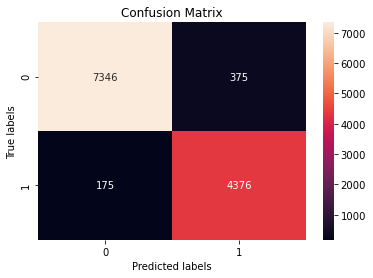

In [100]:
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Preprocessing of the test data

In [27]:
test = pd.read_parquet("offers_test.parquet")

In [31]:
test['color'] = test['color'].apply(lambda x : none_type_clean(x))
test['brand'] = test['brand'].apply(lambda x : none_type_clean(x))

In [32]:
test_zalando, test_a_you = get_offers_by_shop(test)

In [38]:
test_zalando=test_zalando.set_index('offer_id')
test_a_you = test_a_you.set_index('offer_id')
test_zalando.head()

,shop,lang,brand,color,title,description,price,url,image_urls
offer_id,,,,,,,,,
649b7eeb-30be-4bee-9b45-b01f378ba11a,zalando,de,Samsøe Samsøe,dunkelblau,AVERIE Shorts Stoffhose,main_supplier_code K71977 $ name_suffix sky ca...,129.685455,https://www.zalando.de/lookup/article/SA321S00...,[https://img01.ztat.net/article/93b0febd02a34b...
c785fa93-0fd4-456f-8d7b-bb8d2d92f3e2,zalando,de,Tom Tailor,dunkelblau,BLOUSE SOLID WITH TAPE DETAIL Bluse,main_supplier_code K72041 $ skirt_details Zier...,39.990909,https://www.zalando.de/lookup/article/TO221E0V...,[https://img01.ztat.net/article/260bc84f3d343e...
235abf8a-dcb0-4efe-a9ee-8fae0727bcd1,zalando,de,Head,dunkelblau,BREAKER PANTS Jogginghose,main_supplier_code K86919 $ skirt_details elas...,74.958182,https://www.zalando.de/lookup/article/HE741E00...,[https://img01.ztat.net/article/b93e4ae978bc4f...
6eaace6d-db81-4d60-a0d6-551ac3aff75e,zalando,de,G-Star,schwarz,SHORTSLEEVE WORKWEAR Jumpsuit,main_supplier_code K70746 $ name_suffix pitch ...,179.685455,https://www.zalando.de/lookup/article/GS121T0B...,[https://img01.ztat.net/article/82b8640c70614c...
29439fda-3156-4f5d-beaa-7aaeacd01cc9,zalando,de,Michael Kors,roségoldfarben,Uhr,watch_display analog $ watch_material_band Ede...,219.867273,https://www.zalando.de/lookup/article/1MI51M0A...,[https://img01.ztat.net/article/d1286b90769e45...


In [136]:
# dataset.fillna("")
test_zalando.fillna("")
test_a_you.fillna("")

,shop,lang,brand,color,title,description,price,url,image_urls
offer_id,,,,,,,,,
67069c3c-46a7-45ea-ae0f-1cac2571ae68,aboutyou,de,DKNY,beige | Beige,Schal,"{""Marke"": [""DKNY""], ""Gr\u00f6\u00dfenlauf"": [""...",49.99,https://www.aboutyou.de/p/dkny/schal-7221536,[https://cdn.aboutstatic.com/file/images/d8432...
c065bcd3-0669-4061-b1ce-fd6467f81b91,aboutyou,de,MICHAEL Michael Kors,schwarz | Mischfarben,Plisseerock,"{""Marke"": [""MICHAEL Michael Kors""], ""Gr\u00f6\...",79.98,https://www.aboutyou.de/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/687cd...
7dfb8ecf-ba37-42dc-9287-78bac2b0e192,aboutyou,de,MICHAEL Michael Kors,hellbraun | mokka | Braun,Tasche,"{""Zielgruppe"": [""Female""], ""Gr\u00f6\u00dfe (V...",349.00,https://www.aboutyou.at/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/56cd9...
5f42a01e-32e0-4e96-9434-4c2faf4346d1,aboutyou,de,Ragwear,blau | Blau,Winterjacke 'Ashani Puffy',"{""Marke"": [""Ragwear""], ""Zielgruppe"": [""Frauen""...",175.00,https://www.aboutyou.at/p/ragwear/winterjacke-...,[https://cdn.aboutstatic.com/file/images/56fe6...
741db6f2-df81-4926-b716-19487dd2cad0,aboutyou,de,modström,khaki | mischfarben | Grün,Sweatshirt 'Holly',"{""Zielgruppe"": [""Female""], ""Material"": [""Sweat...",79.90,https://www.aboutyou.at/p/modstrom/sweatshirt-...,[https://cdn.aboutstatic.com/file/images/4a0cc...
...,...,...,...,...,...,...,...,...,...
d2cacd94-b639-4cd8-8c48-6f980e0ceabc,aboutyou,de,MICHAEL Michael Kors,schwarz | Schwarz,Portemonnaie,"{""Material"": [""Glattleder""], ""Suchfarbe"": [""Sc...",125.00,https://www.aboutyou.at/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/dad4a...
d9e5931f-2dac-48bc-961b-5a2fd440365f,aboutyou,de,The Kooples,mischfarben | Mischfarben,Hose,"{""Zielgruppe"": [""Female""], ""Material"": [""Polye...",39.99,https://www.aboutyou.de/p/the-kooples/hose-732...,[https://cdn.aboutstatic.com/file/images/14069...
3a7bd650-11ad-45d6-aaab-6b9ed9f26a0a,aboutyou,de,Marc Cain,blau | weiß | Weiß,Kurz-Blazer,"{""Marke"": [""Marc Cain""], ""Gr\u00f6\u00dfenlauf...",114.01,https://www.aboutyou.de/p/marc-cain/kurz-blaze...,[https://cdn.aboutstatic.com/file/images/31694...


In [137]:
test_zalando = test_zalando.reset_index()
test_a_you = test_a_you.reset_index()

In [138]:
test_zalando.tail()

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
36631,25ac1fa5-301e-49c8-8abc-91bd5f87a87a,zalando,de,YAS,schwarz,YASZAL LONG WAISTCOAT Top,main_supplier_code K70240 $ name_suffix black ...,49.990909,https://www.zalando.de/lookup/article/Y0121I09...,[https://img01.ztat.net/article/8962d9e7d9e534...
36632,51e0e356-ebf8-486d-bc94-61649b47c81e,zalando,de,Hugo Boss,schwarz,SOTTELLINA Strickpullover,name_suffix black $ pattern unifarben $ materi...,149.958182,https://www.zalando.de/lookup/article/HU721I09...,[https://img01.ztat.net/article/aaa8bdfc68924b...
36633,d6a7c115-691f-466e-95d1-0091d41622d4,zalando,de,Banana Republic,schwarz,PLEATED MIDI PRINT Faltenrock,main_supplier_code K87048 $ skirt_details Unte...,105.140000,https://www.zalando.de/lookup/article/B1X21B00...,[https://img01.ztat.net/article/2067c293354a3e...
36634,4e647168-2824-47b5-b432-8333a2e9a3dd,zalando,de,Hugo Boss,grey denim,Jeans Slim Fit,name_suffix silver $ material.upper_material_c...,199.958182,https://www.zalando.de/lookup/article/HU722G07...,[https://img01.ztat.net/article/a0b38fa1b6a14d...
36635,bb07beb1-cc8b-4535-b3a3-87f6980e1a55,zalando,de,Tom Tailor,dunkelblau,Espadrille Keilsandalette,main_supplier_code K71970 $ decksohle Textil $...,39.990909,https://www.zalando.de/lookup/article/TO211A0A...,[https://img01.ztat.net/article/a42bee1b360831...


In [139]:
test_a_you['color'] = test_a_you['color'].apply(lambda x : x.replace(" |", ""))
test_a_you['brand'] = test_a_you['brand'].apply(lambda x : x.replace(" |", ""))

In [140]:
test_zalando['color'] = test_zalando['color'].apply(lambda x : x.lower())
test_a_you['color'] = test_a_you['color'].apply(lambda x : x.lower())

test_zalando['brand'] = test_zalando['brand'].apply(lambda x : x.lower())
test_a_you['brand'] = test_a_you['brand'].apply(lambda x : x.lower())

Merging Zalando and Aboutyou based on color and brand to reduce the dataset size

In [198]:
test_merge = pd.merge(test_zalando,test_a_you, on=['color','brand'])

In [199]:
test_merge.tail()

,offer_id,shop_x,lang_x,brand,color,title_x,description_x,price_x,url_x,image_urls_x,shop_y,lang_y,title_y,description_y,price_y,url_y,image_urls_y
12769,1a66a896-41dc-4a34-9e7a-2ad588d1c00b,zalando,de,scholl,schwarz,BERRY Zehentrenner,main_supplier_code K71809 $ decksohle Textil $...,74.776364,https://www.zalando.de/lookup/article/SC211A00...,[https://img01.ztat.net/article/35e01b24f4294f...,aboutyou,de,Rollen 'Velvet Smooth Wet & Dry',"{""Pack"": [""2er Pack""], ""Marke"": [""SCHOLL""], ""A...",20.75,https://www.aboutyou.de/p/scholl/rollen-velvet...,[https://cdn.aboutstatic.com/file/images/b268e...
12770,c537bb29-9a96-4a04-8c34-679cc4628f91,zalando,de,burt's bees,orange,GLOSSY LIPSTICKS Lippenstift,main_supplier_code K72227 $ consistency_option...,13.958182,https://www.zalando.de/lookup/article/BU531F00...,[https://img01.ztat.net/article/65a00fb0890d33...,aboutyou,de,Lipgloss 'Lip Crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""...",13.94,https://www.aboutyou.de/p/burt-s-bees/lipgloss...,[https://cdn.aboutstatic.com/file/images/e61d6...
12771,4e265b8d-98c0-4642-a834-ee46549f8aad,zalando,de,burt's bees,orange,LIP SHIMMER Lippenbalsam,main_supplier_code K72227 $ name_suffix aprico...,7.958182,https://www.zalando.de/lookup/article/BU531F00...,[https://img01.ztat.net/article/fef71f32e82435...,aboutyou,de,Lipgloss 'Lip Crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""...",13.94,https://www.aboutyou.de/p/burt-s-bees/lipgloss...,[https://cdn.aboutstatic.com/file/images/e61d6...
12772,96f86972-2174-4e07-946d-66a4c574d480,zalando,de,nyx professional makeup,orange,EPIC WEAR LINER STICKS Eyeliner,main_supplier_code K75275 $ name_suffix 18 ora...,7.503636,https://www.zalando.de/lookup/article/NY631E03...,[https://img01.ztat.net/article/0c324037563432...,aboutyou,de,Shine Loud High Pigment Lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend...",12.94,https://www.aboutyou.de/p/nyx-professional-mak...,[https://cdn.aboutstatic.com/file/images/32e37...
12773,d2c3ea4a-8b4d-4c2c-8f52-81b2ebafe04e,zalando,de,nyx professional makeup,orange,SHOUT LOUD SATIN LIPSTICK Lippenstift,main_supplier_code K75275 $ consistency_option...,9.594545,https://www.zalando.de/lookup/article/NY631E03...,[https://img01.ztat.net/article/bd6ac609e3f948...,aboutyou,de,Shine Loud High Pigment Lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend...",12.94,https://www.aboutyou.de/p/nyx-professional-mak...,[https://cdn.aboutstatic.com/file/images/32e37...


In [200]:
test_merge.shape

(12774, 17)

In [201]:
test_merge = test_merge.drop(['shop_x', 'lang_x', 'brand', 'price_x', 'url_x', 'image_urls_x', 'shop_y', 'lang_y', 'price_y', 'url_y', 'image_urls_y'], axis=1)

In [203]:
test_merge.tail()

,offer_id,color,title_x,description_x,title_y,description_y
12769,1a66a896-41dc-4a34-9e7a-2ad588d1c00b,schwarz,BERRY Zehentrenner,main_supplier_code K71809 $ decksohle Textil $...,Rollen 'Velvet Smooth Wet & Dry',"{""Pack"": [""2er Pack""], ""Marke"": [""SCHOLL""], ""A..."
12770,c537bb29-9a96-4a04-8c34-679cc4628f91,orange,GLOSSY LIPSTICKS Lippenstift,main_supplier_code K72227 $ consistency_option...,Lipgloss 'Lip Crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""..."
12771,4e265b8d-98c0-4642-a834-ee46549f8aad,orange,LIP SHIMMER Lippenbalsam,main_supplier_code K72227 $ name_suffix aprico...,Lipgloss 'Lip Crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""..."
12772,96f86972-2174-4e07-946d-66a4c574d480,orange,EPIC WEAR LINER STICKS Eyeliner,main_supplier_code K75275 $ name_suffix 18 ora...,Shine Loud High Pigment Lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend..."
12773,d2c3ea4a-8b4d-4c2c-8f52-81b2ebafe04e,orange,SHOUT LOUD SATIN LIPSTICK Lippenstift,main_supplier_code K75275 $ consistency_option...,Shine Loud High Pigment Lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend..."


In [156]:
test_merge = test_merge.reset_index()

In [157]:
test_a_you = test_a_you.set_index('offer_id')

In [204]:
# a_you_col = []
# for i in test_merge['offer_id_y']:
#     for ids in test_a_you.index:
#         if i == ids:
#             a_you_col.append(test_a_you.loc[ids]['color'])

test_merge['a_you_col'] = test_merge['color']

In [205]:
a_you_col[-500]

'beige'

In [168]:
# test_merge['a_you_col'] = a_you_col

In [207]:
test_merge.tail()

,offer_id,color,title_x,description_x,title_y,description_y,a_you_col
12769,1a66a896-41dc-4a34-9e7a-2ad588d1c00b,schwarz,BERRY Zehentrenner,main_supplier_code K71809 $ decksohle Textil $...,Rollen 'Velvet Smooth Wet & Dry',"{""Pack"": [""2er Pack""], ""Marke"": [""SCHOLL""], ""A...",schwarz
12770,c537bb29-9a96-4a04-8c34-679cc4628f91,orange,GLOSSY LIPSTICKS Lippenstift,main_supplier_code K72227 $ consistency_option...,Lipgloss 'Lip Crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""...",orange
12771,4e265b8d-98c0-4642-a834-ee46549f8aad,orange,LIP SHIMMER Lippenbalsam,main_supplier_code K72227 $ name_suffix aprico...,Lipgloss 'Lip Crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""...",orange
12772,96f86972-2174-4e07-946d-66a4c574d480,orange,EPIC WEAR LINER STICKS Eyeliner,main_supplier_code K75275 $ name_suffix 18 ora...,Shine Loud High Pigment Lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend...",orange
12773,d2c3ea4a-8b4d-4c2c-8f52-81b2ebafe04e,orange,SHOUT LOUD SATIN LIPSTICK Lippenstift,main_supplier_code K75275 $ consistency_option...,Shine Loud High Pigment Lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend...",orange


In [172]:
# test_merge = test_merge.drop(['index'], axis = 1)

In [208]:
test_merge=test_merge.rename(columns={'offer_id_x':'zalando','offer_id_y':'aboutyou','title_x':'zal_title','title_y':'a_you_title','color':'zal_col','description_x':'zal_des','description_y':'a_you_des'})

In [209]:
test_merge.shape

(12774, 7)

In [210]:
%store test_merge

Stored 'test_merge' (DataFrame)


In [211]:
final_test_merge = test_merge

### Getting similarity scores for the test data attributes

In [212]:
final_test_merge = engineer_features(test_merge)

In [214]:
test_merge.tail()

,offer_id,zal_col,zal_title,zal_des,a_you_title,a_you_des,a_you_col,levenshtein_distance_title,damerau_levenshtein_distance_title,hamming_distance_title,...,partial_ratio_title,token_sort_ratio_title,token_set_ratio_title,w_ratio_title,uq_ratio_title,q_ratio_title,matching_numbers_title,matching_numbers_log_title,log_fuzz_score_title,log_fuzz_score_numbers_title
12769,1a66a896-41dc-4a34-9e7a-2ad588d1c00b,schwarz,berry zehentrenner,main_supplier_code K71809 $ decksohle Textil $...,rollen 'velvet smooth wet & dry',"{""Pack"": [""2er Pack""], ""Marke"": [""SCHOLL""], ""A...",schwarz,26,26,31,...,33,35,35,30,29,29,1.0,0.693147,4.875197,4.875197
12770,c537bb29-9a96-4a04-8c34-679cc4628f91,orange,glossy lipsticks lippenstift,main_supplier_code K72227 $ consistency_option...,lipgloss 'lip crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""...",orange,21,21,28,...,48,47,47,46,46,46,1.0,0.693147,5.231109,5.231109
12771,4e265b8d-98c0-4642-a834-ee46549f8aad,orange,lip shimmer lippenbalsam,main_supplier_code K72227 $ name_suffix aprico...,lipgloss 'lip crayon',"{""Marke"": [""BURT'S BEES""], ""Anwendungsbereich""...",orange,17,17,21,...,43,47,47,45,41,41,1.0,0.693147,5.176150,5.176150
12772,96f86972-2174-4e07-946d-66a4c574d480,orange,epic wear liner sticks eyeliner,main_supplier_code K75275 $ name_suffix 18 ora...,shine loud high pigment lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend...",orange,24,24,29,...,37,41,41,39,34,34,1.0,0.693147,5.030438,5.030438
12773,d2c3ea4a-8b4d-4c2c-8f52-81b2ebafe04e,orange,shout loud satin lipstick lippenstift,main_supplier_code K75275 $ consistency_option...,shine loud high pigment lip,"{""Marke"": [""NYX Professional Makeup""], ""Anwend...",orange,23,23,29,...,52,50,50,50,50,50,1.0,0.693147,5.308268,5.308268


In [186]:
final_test_merge = engineer_features1(test_merge)

In [187]:
final_test_merge = engineer_features2(test_merge)

In [189]:
final_test_merge.head()

,zalando,zal_col,zal_title,zal_des,aboutyou,a_you_title,a_you_des,a_you_col,levenshtein_distance_title,damerau_levenshtein_distance_title,...,jaro_winkler_similarity_des,match_rating_comparison_des,ratio_des,partial_ratio_des,token_sort_ratio_des,token_set_ratio_des,matching_numbers_des,matching_numbers_log_des,log_fuzz_score_des,log_fuzz_score_numbers_des
0,5547d05e-620a-4a4a-8cd9-2fd6bda5b737,schwarz,vegan signature brush set pinsel-set,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,32,32,...,0.570075,0,28,37,29,32,0.111111,0.105361,4.836282,2.639057
1,ec93b1f5-2147-44da-83f3-0c1dcc0ebfb7,schwarz,foundation brush make-up-pinsel,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,31,31,...,0.554811,0,26,37,27,32,0.100000,0.095310,4.804021,2.501436
2,7749438b-97a0-47ac-ba83-926083e0069f,schwarz,classic contour make-up-pinsel,main_supplier_code k88101 $ name_suffix black ...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,32,32,...,0.556655,0,25,36,28,32,0.100000,0.095310,4.795791,2.493205
3,2d5a2ec8-73f6-45dd-a32a-779ef48d82fe,schwarz,eye shader brush lidschattenpinsel,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,33,32,...,0.555956,0,26,38,27,32,0.100000,0.095310,4.812184,2.509599
4,07a1a805-8a2d-4e5b-8981-be5118d841ed,schwarz,foundation brush make-up-pinsel,main_supplier_code k88101 $ name_suffix black ...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,31,31,...,0.558100,0,25,37,27,32,0.100000,0.095310,4.795791,2.493205


In [188]:
%store final_test_merge

Stored 'final_test_merge' (DataFrame)


In [2]:
%store -r final_test_merge

In [3]:
final_test_merge.shape

(12774, 56)

Dropping the columns that are not required

In [4]:
m_input = final_test_merge.drop(['zalando', 'zal_col', 'zal_title', 'zal_des', 'aboutyou', 'a_you_title', 'a_you_des', 'a_you_col'], axis = 1)

In [5]:
m_input = m_input.drop(['matching_numbers_col','matching_numbers_log_col'], axis=1)

In [6]:
m_input.head()

,levenshtein_distance_title,damerau_levenshtein_distance_title,hamming_distance_title,jaro_similarity_title,jaro_winkler_similarity_title,match_rating_comparison_title,ratio_title,partial_ratio_title,token_sort_ratio_title,token_set_ratio_title,...,jaro_winkler_similarity_des,match_rating_comparison_des,ratio_des,partial_ratio_des,token_sort_ratio_des,token_set_ratio_des,matching_numbers_des,matching_numbers_log_des,log_fuzz_score_des,log_fuzz_score_numbers_des
0,32,32,34,0.634909,0.634909,0,34,35,35,37,...,0.570075,0,28,37,29,32,0.111111,0.105361,4.836282,2.639057
1,31,31,33,0.578236,0.578236,0,30,32,47,47,...,0.554811,0,26,37,27,32,0.100000,0.095310,4.804021,2.501436
2,32,32,34,0.596032,0.596032,0,28,30,48,48,...,0.556655,0,25,36,28,32,0.100000,0.095310,4.795791,2.493205
3,33,32,33,0.622180,0.622180,0,32,33,42,42,...,0.555956,0,26,38,27,32,0.100000,0.095310,4.812184,2.509599
4,31,31,33,0.578236,0.578236,0,30,32,47,47,...,0.558100,0,25,37,27,32,0.100000,0.095310,4.795791,2.493205


### Using the trained model to predict the matches

In [8]:
pred_sub = model.predict(m_input)

In [9]:
pred_sub = list(pred_sub)

Adding the predicted match column to the data

In [10]:
final_test_merge['match'] = pred_sub

In [11]:
final_test_merge.head()

,zalando,zal_col,zal_title,zal_des,aboutyou,a_you_title,a_you_des,a_you_col,levenshtein_distance_title,damerau_levenshtein_distance_title,...,match_rating_comparison_des,ratio_des,partial_ratio_des,token_sort_ratio_des,token_set_ratio_des,matching_numbers_des,matching_numbers_log_des,log_fuzz_score_des,log_fuzz_score_numbers_des,match
0,5547d05e-620a-4a4a-8cd9-2fd6bda5b737,schwarz,vegan signature brush set pinsel-set,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,32,32,...,0,28,37,29,32,0.111111,0.105361,4.836282,2.639057,0
1,ec93b1f5-2147-44da-83f3-0c1dcc0ebfb7,schwarz,foundation brush make-up-pinsel,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,31,31,...,0,26,37,27,32,0.100000,0.095310,4.804021,2.501436,1
2,7749438b-97a0-47ac-ba83-926083e0069f,schwarz,classic contour make-up-pinsel,main_supplier_code k88101 $ name_suffix black ...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,32,32,...,0,25,36,28,32,0.100000,0.095310,4.795791,2.493205,1
3,2d5a2ec8-73f6-45dd-a32a-779ef48d82fe,schwarz,eye shader brush lidschattenpinsel,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,33,32,...,0,26,38,27,32,0.100000,0.095310,4.812184,2.509599,0
4,07a1a805-8a2d-4e5b-8981-be5118d841ed,schwarz,foundation brush make-up-pinsel,main_supplier_code k88101 $ name_suffix black ...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,31,31,...,0,25,37,27,32,0.100000,0.095310,4.795791,2.493205,1


Creating a variable for only the matched products

In [12]:
submission = final_test_merge[final_test_merge['match'] == 1]

In [13]:
submission.head()

,zalando,zal_col,zal_title,zal_des,aboutyou,a_you_title,a_you_des,a_you_col,levenshtein_distance_title,damerau_levenshtein_distance_title,...,match_rating_comparison_des,ratio_des,partial_ratio_des,token_sort_ratio_des,token_set_ratio_des,matching_numbers_des,matching_numbers_log_des,log_fuzz_score_des,log_fuzz_score_numbers_des,match
1,ec93b1f5-2147-44da-83f3-0c1dcc0ebfb7,schwarz,foundation brush make-up-pinsel,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,31,31,...,0,26,37,27,32,0.1,0.09531,4.804021,2.501436,1
2,7749438b-97a0-47ac-ba83-926083e0069f,schwarz,classic contour make-up-pinsel,main_supplier_code k88101 $ name_suffix black ...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,32,32,...,0,25,36,28,32,0.1,0.09531,4.795791,2.493205,1
4,07a1a805-8a2d-4e5b-8981-be5118d841ed,schwarz,foundation brush make-up-pinsel,main_supplier_code k88101 $ name_suffix black ...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,31,31,...,0,25,37,27,32,0.1,0.09531,4.795791,2.493205,1
5,61120c1d-912c-4c8f-82f8-d59557bf5105,schwarz,contour brush make-up-pinsel,main_supplier_code k88101 $ name_suffix - $ co...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,32,32,...,0,25,37,27,32,0.1,0.09531,4.795791,2.493205,1
9,d8d97591-b810-443b-9416-de9c1ab64e2a,schwarz,prime foundation make-up-pinsel,main_supplier_code k88101 $ name_suffix black ...,f8980475-3d94-48ae-978c-16f77f50d7be,kabukipinsel 'the essential kabuki',"{""detailfarbe"": [""schwarz""], ""ordersaison"": [""...",schwarz,32,32,...,0,25,37,28,31,0.1,0.09531,4.795791,2.493205,1


We only need offer_id of zalando and ids of aboutyou for the submission

In [14]:
submission = submission[['zalando', 'aboutyou']]

In [15]:
submission.head()

,zalando,aboutyou
1,ec93b1f5-2147-44da-83f3-0c1dcc0ebfb7,f8980475-3d94-48ae-978c-16f77f50d7be
2,7749438b-97a0-47ac-ba83-926083e0069f,f8980475-3d94-48ae-978c-16f77f50d7be
4,07a1a805-8a2d-4e5b-8981-be5118d841ed,f8980475-3d94-48ae-978c-16f77f50d7be
5,61120c1d-912c-4c8f-82f8-d59557bf5105,f8980475-3d94-48ae-978c-16f77f50d7be
9,d8d97591-b810-443b-9416-de9c1ab64e2a,f8980475-3d94-48ae-978c-16f77f50d7be


Creating a parquet file

In [16]:
submission.to_parquet('matches_test_predicted.parquet')

In [48]:
def plot_images_zal(product):
    
    # Data
    images = test_zalando.loc[product]['image_urls']
    
    # Plot it!
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4), dpi=100)
    print(f"Zalando: {test_zalando.loc[product]['title']} {test_zalando.loc[product]['color']}")

    
    if len(images) > 1:     
        axes = axes.flatten()
        for i, axis in enumerate(axes):
            url = images[i]
            image = np.array(Image.open(urllib.request.urlopen(url)))
            axis.imshow(image)
            axis.axis('off')
    else:
        url = images[0]
        image = np.array(Image.open(urllib.request.urlopen(url)))
        axes.imshow(image)
        axes.axis('off')

    fig.tight_layout()
    plt.show()

In [49]:
def plot_images_a_you(product):
    
    # Data
    images = test_a_you.loc[product]['image_urls']
    
    # Plot it!
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4), dpi=100)
    print(f"aboutyou: {test_a_you.loc[product]['title']} {test_a_you.loc[product]['color']}")

    
    if len(images) > 1:     
        axes = axes.flatten()
        for i, axis in enumerate(axes):
            url = images[i]
            image = np.array(Image.open(urllib.request.urlopen(url)))
            axis.imshow(image)
            axis.axis('off')
    else:
        url = images[0]
        image = np.array(Image.open(urllib.request.urlopen(url)))
        axes.imshow(image)
        axes.axis('off')

    fig.tight_layout()
    plt.show()

In [51]:
# test_zalando.head()

Zalando: THATS THE POINT EYELINER Eyeliner schwarz


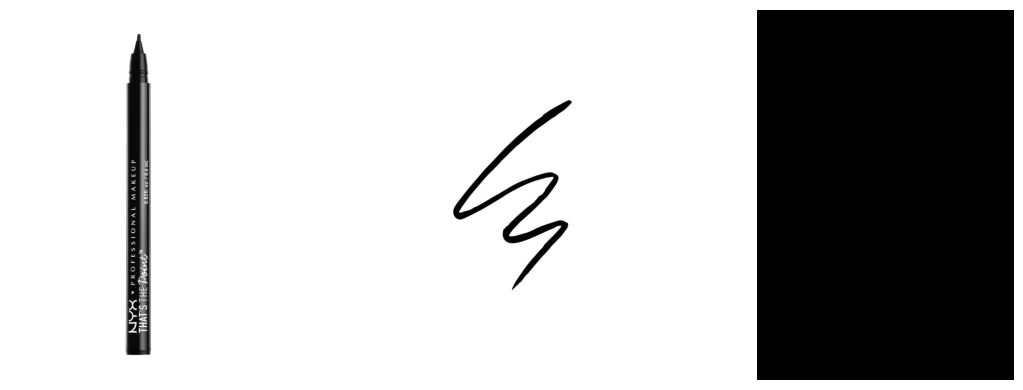

In [112]:
plot_images_zal(submission['zalando'][666])
# test_zalando.loc['ec93b1f5-2147-44da-83f3-0c1dcc0ebfb7']['image_urls']

aboutyou: Eyeliner Schwarz


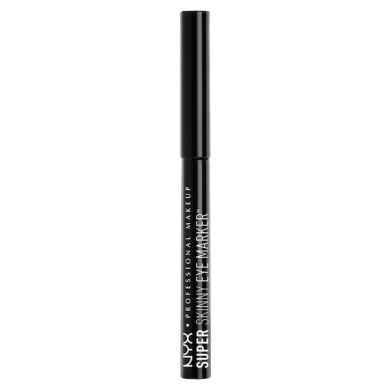

In [113]:
plot_images_a_you(submission['aboutyou'][666])